In [1]:
# 1. 다차원 척도법
# 분석 시나리오 - ① 단순 경쟁구조 분석

# A쇼핑의 포지셔닝 분석을 위해 6개의 주요 경쟁업체와 함께 단순 경쟁구조 분석을 수행해보도록 한다. 
# 자극점은 A사를 포함하여 총 7개의 쇼핑몰을, 속성은 이미지, 접근성, 서비스, 친절성, 편의시설, 인지도, 가격만족도 등 총 7개로 설정하여 
# 고객들의 설문을 통해 데이터를 수집하였다.

In [2]:
# 1. 모듈 및 데이터 탑재
import pandas as pd
from sklearn.manifold import MDS

df = pd.read_csv('MDS1.csv', sep=',', encoding='CP949') 



# 2. 다차원척도법 분석(차원 좌표 값 계산)
clf = MDS(n_components=2, random_state=123).fit(df.loc[:,'이미지':'가격만족도'])
X_mds = clf.fit_transform(df.loc[:,'이미지':'가격만족도'])
X_mds

C:\Users\USER\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

array([[-5.12747416, -0.46862067],
       [-3.25268823,  1.50430496],
       [ 3.52362088,  2.80304347],
       [ 2.97433754, -7.052197  ],
       [-3.84248425,  4.10485347],
       [ 4.66327843, -5.74998855],
       [ 1.06140978,  4.85860431]])

In [3]:
# 아래에 '앞서 생성한 좌표 값'을 기준으로 단순 경쟁구조를 그래프로 표현

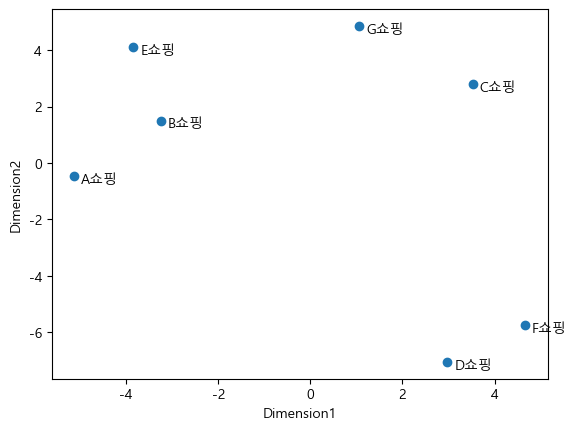

In [4]:
# 1. 모듈 및 패키지 불러오기
import matplotlib 
import matplotlib.pylab as plt


# 2. 한글깨짐현상 방지
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False
%matplotlib inline


# 3. 단순 경쟁구조 시각화
labels = df.shop
for label, x_count, y_count in zip(labels, X_mds[:,0], X_mds[:,1]):
    plt.annotate(label,
                xycoords='data',
                textcoords='offset points',
                xy=(x_count, y_count), 
                xytext=(5,-5) )
plt.xlabel('Dimension1')
plt.ylabel('Dimension2')
plt.scatter(X_mds[:,0], X_mds[:,1])

In [5]:
# 2. 속성-경쟁구조 분석
# 앞서 단순 경쟁구조 분석 결과 각 쇼핑몰간의 경쟁구조를 파악할 수 있었지만, 
# 쇼핑몰의 어떤 속성관점에서 경쟁이 이루어지는지 알 수 없었다. 
# 이러한 쇼핑몰의 경쟁구조를 보다 정확하게 판단하기 위해서는 속성 역시 포지셔닝 맵에 표현해야 한다. 
# 이를 위해 속성-경쟁구조 분석을 위한 다차원 척도법을 실행해보자.

In [6]:
# 2-1. 모듈 및 데이터 탑재
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.manifold import MDS
import numpy as np

df = pd.read_csv('MDS1.csv', sep=',', encoding='CP949') 
df1 = df.loc[:,'이미지':'가격만족도']
df1 = (df1 - df1.min()) / (df1.max() - df1.min()) #정규화(요소값–최소값)/(최대값-최소값)


# 2-2. 다차원척도법 분석(차원 좌표 값 계산)
clf = MDS(n_components=2, random_state=123).fit(df1)
X_mds = clf.fit_transform(df1) 


# 2-3. 속성 차원 좌표 값 계산
df1['차원1'] = X_mds[:,0]
df1['차원2'] = X_mds[:,1]
model = []
model.append(smf.ols(formula = '이미지 ~ 차원1+차원2', data = df1).fit( ))
model.append(smf.ols(formula = '접근성 ~ 차원1+차원2', data = df1).fit( ))
model.append(smf.ols(formula = '서비스 ~ 차원1+차원2', data = df1).fit( ))
model.append(smf.ols(formula = '친절성 ~ 차원1+차원2', data = df1).fit( ))
model.append(smf.ols(formula = '편의시설 ~ 차원1+차원2', data = df1).fit( ))
model.append(smf.ols(formula = '인지도 ~ 차원1+차원2', data = df1).fit( ))
model.append(smf.ols(formula = '가격만족도 ~ 차원1+차원2', data = df1).fit( ))
속성 = []
for i in range(0,7,1):
   속성.append([model[i].params[1], model[i].params[2]])
속성 = np.array(속성)
자극점및속성 = np.hstack([X_mds,속성])
자극점및속성

C:\Users\USER\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `n

array([[-1.03202434, -0.00641877,  0.54559765, -0.10043696],
       [-0.53757021,  0.28266513,  0.12883623, -0.42074909],
       [ 0.71120717,  0.32238053, -0.06935846,  0.37280673],
       [ 0.19723554, -1.25906064, -0.61440613,  0.00507243],
       [-0.51913327,  0.83498409, -0.1219796 , -0.48451721],
       [ 0.69997592, -0.99534218, -0.17062737,  0.41435935],
       [ 0.4803092 ,  0.82079184, -0.29692794, -0.32744816]])

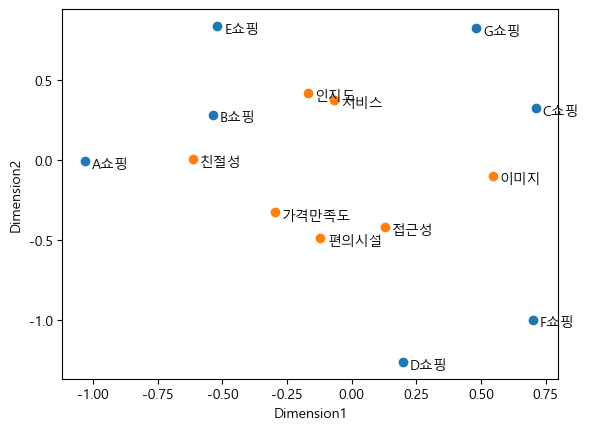

In [7]:
# 2-4. 그래프로 표현
# 1. 모듈 및 패키지 불러오기
import matplotlib 
import matplotlib.pylab as plt


# 2. 한글깨짐현상 방지
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False
%matplotlib inline


# 3. 속성-경쟁구조 시각화
labels = df.shop
for label, x_count, y_count in zip(labels, 자극점및속성[:,0], 자극점및속성[:,1]):
    plt.annotate(label,
                xycoords='data',
                textcoords='offset points',
                xy=(x_count, y_count), 
                xytext=(5,-5) ) 
labels2 = df1.columns
for label, x_count, y_count in zip(labels2, 자극점및속성[:,2], 자극점및속성[:,3]):
    plt.annotate(label,
                xycoords='data',
                textcoords='offset points',
                xy=(x_count, y_count), 
                xytext=(5,-5) ) 
plt.xlabel('Dimension1')
plt.ylabel('Dimension2')
plt.scatter(자극점및속성[:,0], 자극점및속성[:,1]) #자극점 좌표 그래프
plt.scatter(자극점및속성[:,2], 자극점및속성[:,3]) #속성 좌표 그래프

In [8]:
# 결과
# A 쇼핑몰은 친절성에 상당히 경쟁력이 있는 반면, 이미지나 접근성 관점에서는 다소 경쟁력이 약함을 알 수 있다.

In [9]:
# 3. 이상점-경쟁구조 분석
# 이번에는 기업간의 경쟁구조에 고객들의 선호위치도 함께 표현해줄 수 있는 
# 이상점-경쟁구조 분석을 위한 다차원 척도법을 실행해보도록 하자.

In [10]:
# 1. 모듈 및 데이터 탑재
import pandas as pd
from sklearn.manifold import MDS
df1 = pd.read_csv('MDS1.csv', sep=',', encoding='CP949')
df3 = pd.read_csv('MDS3.csv', sep=',', encoding='CP949') 


# 2. 다차원척도법 분석(좌표 값 계산)
clf = MDS(n_components=2, random_state=123)
X_mds1 = clf.fit_transform(df1.loc[:,'이미지':'가격만족도'])
X_mds3 = clf.fit_transform(df3.loc[:,'A쇼핑':'G쇼핑'])
print('자극점 차원좌표\n',X_mds1)
print('이상점 차원좌표\n',X_mds3)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


자극점 차원좌표
 [[-5.12747416 -0.46862067]
 [-3.25268823  1.50430496]
 [ 3.52362088  2.80304347]
 [ 2.97433754 -7.052197  ]
 [-3.84248425  4.10485347]
 [ 4.66327843 -5.74998855]
 [ 1.06140978  4.85860431]]
이상점 차원좌표
 [[ 2.7354006   5.32664303]
 [-2.1360224   8.10491964]
 [ 1.37383444  4.75440488]
 [ 4.78027733  5.39841786]
 [-2.92935293  3.70632116]
 [ 2.02096498  0.57066523]
 [ 0.39901568  7.96677486]
 [-0.61295079  4.04795287]
 [-2.36529377  4.93922075]
 [ 6.77540745  2.17586621]
 [ 0.29473788  0.04065551]
 [-1.45123385  5.35814723]
 [-1.4889586   8.25325437]
 [-1.07423428  6.06453624]
 [-3.9547524   5.92929406]
 [ 1.94467614  5.85439476]
 [ 1.22661102  7.29280422]
 [ 3.20492898  3.22704961]
 [ 2.4826813   6.52333136]
 [-3.51732761  2.44092723]
 [ 2.6988953   2.45424353]
 [ 3.81546557  6.13831542]
 [ 3.53811235 -0.85511417]
 [ 1.27213181  3.47618695]
 [-4.19946686  6.41042256]
 [ 2.29587709  4.03529425]
 [ 4.91748167  4.39896309]
 [ 5.01613395  5.48260971]
 [-2.54316507  3.9255062 ]
 [ 0.05

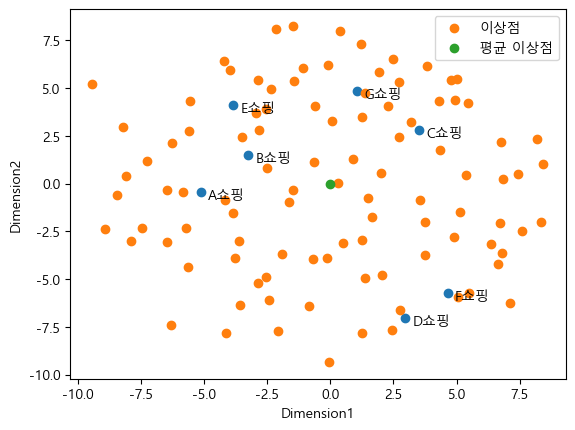

In [11]:
# 3. 그래프로 표현
# 3-1. 모듈 및 패키지 불러오기
import matplotlib 
import matplotlib.pylab as plt


# 3-2. 한글깨짐현상 방지
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False
%matplotlib inline


# 3-3. 이상점-경쟁구조 시각화
labels = df1.shop
for label, x_count, y_count in zip(labels, X_mds1[:,0], X_mds1[:,1]):
    plt.annotate(label,
                xycoords='data',
                textcoords='offset points',
                xy=(x_count, y_count), 
                xytext=(5,-5) ) 
plt.xlabel('Dimension1')
plt.ylabel('Dimension2')
plt.scatter(X_mds1[:,0],X_mds1[:,1])
plt.scatter(X_mds3[:,0],X_mds3[:,1],label='이상점')
plt.scatter(X_mds3[:,0].mean(),X_mds3[:,1].mean(),label='평균 이상점')
plt.legend(loc='upper right')

In [12]:
# 4. 상응분석 - 단순 상응분석
# 먼저 슬로프 난이도를 기준으로 국내 각 리조트의 경쟁관계 혹은 포지셔닝을 살펴보는 단순 상응분석을 진행해보자.

In [21]:
# 4-1. 모듈 및 데이터 탑재
import pandas as pd
import prince
cor = pd.read_csv('Correspondence.csv', sep=',', encoding='CP949') 
X=pd.crosstab(cor.resort, cor.slope, margins=False)


# 4-2. 단순 상응분석(차원 좌표 값 계산)
import prince
ca = prince.CA(n_components=2).fit(X)
print('리조트 기준 차원좌표\n',ca.row_coordinates(X))
print('\n슬로프 기준 차원좌표\n',ca.column_coordinates(X))

리조트 기준 차원좌표
                0         1
resort                    
대명     -0.297192  0.064504
리솜     -0.079668 -0.052946
무주     -0.496362 -0.067862
용평      0.554549 -0.155482
한화      0.318672  0.211785

슬로프 기준 차원좌표
                 0         1
slope                      
Slope-H  0.256394  0.155651
Slope-L -0.515052 -0.012403
Slope-M  0.327482 -0.161521


In [22]:
# !pip install prince

In [39]:
# 4-3. 그래프로 나타내기
# 1. 패키지 불러오기
import matplotlib 

# 2. 한글깨짐현상 방지
matplotlib.rcParams['font.family'] = 'Malgun Gothic'

# 3. 단순 상응분석 시각화
ca.plot_coordinates(X=X, figsize=(10, 7), show_row_labels=True, show_col_labels=True)

AttributeError: 'CA' object has no attribute 'plot_coordinates'

In [40]:
# 이 오류는 CA 객체에 plot_coordinates라는 메서드가 없다는 것을 의미합니다. 
# 이는 사용하는 상응분석(Correspondence Analysis) 라이브러리에서 해당 메서드를 지원하지 않기 때문일 수 있습니다.

In [41]:
# 5. 다중 상응분석
# 리조트 간의 경쟁관계를 슬로프 수준뿐만 아니라 교통편의성, 숙박편의성, 기타편의성 등 다른 요인을 동시에 고려하여 
# 리조트 간의 포지셔닝을 살펴보도록 하자.

In [42]:
#1. 모듈 및 데이터 탑재
import pandas as pd
import prince
cor = pd.read_csv('Correspondence.csv', sep=',', encoding='CP949') 
X=cor.loc[1:]


#2. 다중 상응분석(차원 좌표 값 계산)
mca = prince.MCA(n_components=2).fit(X)
print('\n각 변수별 차원좌표\n',mca.column_coordinates(X))


각 변수별 차원좌표
                           0         1
id_2              -0.329924 -0.917655
id_3              -0.750797  1.101125
id_4              -1.059873  0.774037
id_5              -1.261131  0.483018
id_6              -0.838453  0.475164
...                     ...       ...
lodging_Lodging-L -0.498824  0.443290
lodging_Lodging-M -0.057459  0.238564
etc_Etc-H          1.159324 -0.160972
etc_Etc-L         -0.514376 -0.502025
etc_Etc-M         -0.350265  0.458238

[66 rows x 2 columns]


In [43]:
#1. 모듈 및 패키지 불러오기
import matplotlib 

#2. 한글깨짐현상 방지
matplotlib.rcParams['font.family'] = 'Malgun Gothic'

#3. 다중 상응분석 시각화	
mca.plot_coordinates(X=X, show_column_labels=True)

AttributeError: 'MCA' object has no attribute 'plot_coordinates'